## Variables aleatorias y gráficos

### Analizando el Índice de Desarrollo Humano

In [1]:
%matplotlib inline
# importamos la triada de Data Science
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# importamos scipy.stats que ayudará a generar distribuciones
import scipy.stats as stats
# archivos con funciones de visualización
import lec3_graphs as gfx
plt.style.use('seaborn-whitegrid') # Gráficos estilo seaborn
plt.rcParams["figure.figsize"] = (20, 15) # Tamaño gráficos

In [2]:
df = pd.read_csv('qog_std_cs_jan18.csv')
df.shape

(194, 1882)

In [3]:
df['undp_hdi'].describe().round(3)

count    186.000
mean       0.696
std        0.155
min        0.347
25%        0.567
50%        0.726
75%        0.805
max        0.948
Name: undp_hdi, dtype: float64

#### Para obtener una lista de los países que no registran niveles de desarrollo humano, podemos hacer lo siguiente:

In [4]:
# Generamos una nueva columna que devuelva un booleano si es que la observación no está presente
df['flagnull'] = df['undp_hdi'].isnull()

# dentro de cada fila de nuestra base
for i, r in df.iterrows():
    # si flagnull es verdadero
    if r['flagnull'] is True:
        # imprime el nombre
        print(r['cname'])

Taiwan
Korea, North
Monaco
Nauru
Marshall Islands
San Marino
Somalia
Tuvalu


In [5]:
# Obs: Hay una forma menos 'memory hungry' de hacer esto con el metodo 'loc' que veremos mas adelante:
df.loc[df['undp_hdi'].isnull()]['cname'].unique()

array(['Taiwan', 'Korea, North', 'Monaco', 'Nauru', 'Marshall Islands',
       'San Marino', 'Somalia', 'Tuvalu'], dtype=object)

## Digresión: Sobre iterrows y otros métodos

In [6]:
for i in df:
    print(i)

ccode
cname
ccodealp
ccodecow
ccodewb
version
aid_cpnc
aid_cpsc
aid_crnc
aid_crnio
aid_crsc
aid_crsio
ajr_settmort
al_ethnic
al_language
al_religion
bci_bci
bci_bcistd
bi_a_total
bi_p_total
bi_t_total
bicc_gmi
bicc_hw
bicc_milexp
bicc_milper
bs_ee
bs_h
bs_ij
bs_lma
bs_pp
bs_scnd
bs_sji_unw
bs_sji_w
bti_aar
bti_acp
bti_aod
bti_ba
bti_cdi
bti_ci
bti_cps
bti_cr
bti_csp
bti_cst
bti_ds
bti_eo
bti_eos
bti_ep
bti_epg
bti_ffe
bti_foe
bti_ic
bti_ig
bti_ij
bti_lod
bti_mes
bti_mi
bti_mo
bti_mp
bti_muf
bti_nird
bti_pdi
bti_poa
bti_pp
bti_prp
bti_ps
bti_psi
bti_rol
bti_sc
bti_sdi
bti_seb
bti_sel
bti_si
bti_sop
bti_ssn
bti_st
bti_su
bti_wr
ccp_buildsoc
ccp_cc
ccp_childwrk
ccp_civil
ccp_democ
ccp_equal
ccp_freerel
ccp_hr
ccp_infoacc
ccp_initiat
ccp_market
ccp_marriage
ccp_samesexm
ccp_slave
ccp_socialsm
ccp_strike
ccp_syst
ccp_systyear
ccp_taxes
ciri_assn
ciri_disap
ciri_dommov
ciri_elecsd
ciri_empinx_new
ciri_formov
ciri_injud
ciri_kill
ciri_physint
ciri_polpris
ciri_relfre_new
ciri_speech
ciri_tort

wdi_acelu
wdi_acis
wdi_acisr
wdi_acisu
wdi_aciw
wdi_aciwr
wdi_aciwu
wdi_afp
wdi_afpt
wdi_agedr
wdi_agrland
wdi_ane
wdi_araland
wdi_area
wdi_armexp
wdi_armimp
wdi_bhr
wdi_birth
wdi_birthreg
wdi_birthregr
wdi_birthregu
wdi_birthskill
wdi_brdeath
wdi_bribfirm
wdi_broadb
wdi_busden
wdi_co2
wdi_death
wdi_deathreg
wdi_debt
wdi_eduprp
wdi_eduprs
wdi_effrevmob
wdi_elerenew
wdi_elprodcoal
wdi_elprodgas
wdi_elprodhyd
wdi_elprodnuc
wdi_elprodoil
wdi_emp
wdi_empagr
wdi_empagrf
wdi_empagrm
wdi_empch
wdi_empchf
wdi_empchm
wdi_empf
wdi_empind
wdi_empindf
wdi_empindm
wdi_empm
wdi_empprfilo
wdi_empprfne
wdi_empprilo
wdi_empprmilo
wdi_empprmne
wdi_empprne
wdi_emppryfilo
wdi_emppryfne
wdi_emppryilo
wdi_empprymilo
wdi_empprymne
wdi_emppryne
wdi_empser
wdi_empserf
wdi_empserm
wdi_eneimp
wdi_enerenew
wdi_eneuse
wdi_eodb
wdi_eqpubres
wdi_expedu
wdi_expeduge
wdi_expedup
wdi_expedus
wdi_expedut
wdi_exph
wdi_exphpr
wdi_exphpu
wdi_exphpuge
wdi_exphpuhe
wdi_expmil
wdi_expmilge
wdi_export
wdi_expstup
wdi_expstus
w

In [7]:
demo = pd.DataFrame(np.random.randn(3, 4), columns=['col1', 'col2', 'col3', 'col4'])
demo

,col1,col2,col3,col4
0,-0.109629,-0.109319,0.750121,0.663784
1,0.962880,0.271864,-0.273518,0.640764
2,1.032486,0.425296,-0.845390,2.572396


In [8]:
for llave, valor in demo.iteritems():
    print(llave, valor)

col1 0   -0.109629
1    0.962880
2    1.032486
Name: col1, dtype: float64
col2 0   -0.109319
1    0.271864
2    0.425296
Name: col2, dtype: float64
col3 0    0.750121
1   -0.273518
2   -0.845390
Name: col3, dtype: float64
col4 0    0.663784
1    0.640764
2    2.572396
Name: col4, dtype: float64


In [9]:
for indice, valor in demo.iterrows():
    print(indice, valor)

0 col1   -0.109629
col2   -0.109319
col3    0.750121
col4    0.663784
Name: 0, dtype: float64
1 col1    0.962880
col2    0.271864
col3   -0.273518
col4    0.640764
Name: 1, dtype: float64
2 col1    1.032486
col2    0.425296
col3   -0.845390
col4    2.572396
Name: 2, dtype: float64


#### Histograma: Visualizando el comportamiento de una variable

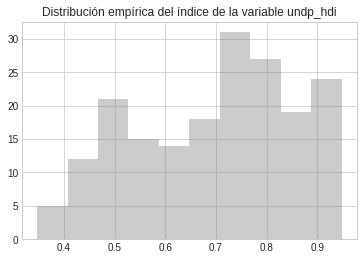

In [10]:
# vamos a eliminar los datos perdidos en la columna undp_hdi con dropna()
hdi_dropna = df['undp_hdi'].dropna();
plt.hist(hdi_dropna, color='grey', alpha=.4)
plt.title("Distribución empírica del índice de la variable undp_hdi");

## Digresión: Sobre loc e iloc

## <pandas.DataFrame>.(loc|iloc)[fila, columnas]

## <pandas.DataFrame>.(loc|iloc)[['elementos','de','fila'], ['elementos','de','columna']]

In [11]:
hdi_group = df.loc[:, ['cname', 'ccode', 'undp_hdi', 'ht_region'] ]
hdi_group.shape

(194, 4)

In [12]:
hdi_group.head(15)

,cname,ccode,undp_hdi,ht_region
0,Afghanistan,4,0.479,8
1,Albania,8,0.762,1
2,Algeria,12,0.743,3
3,Andorra,20,0.857,5
4,Angola,24,0.531,4
5,Antigua and Barbuda,28,0.784,10
6,Azerbaijan,31,0.758,1
7,Argentina,32,0.826,2
8,Australia,36,0.937,5
9,Austria,40,0.892,5


### replace

In [13]:
hdi_group['region_recod'] = hdi_group['ht_region'].replace([1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                                                            ['EastEurope', 'LatAm', 'NorthAfrica',
                                                            'SubSaharian', 'WesternDem', 'EastAsia',
                                                            'SouthEastAsia','SouthAsia','Pacific', 
                                                             'Caribbean' ])

In [14]:
hdi_group.head(20)

,cname,ccode,undp_hdi,ht_region,region_recod
0,Afghanistan,4,0.479,8,SouthAsia
1,Albania,8,0.762,1,EastEurope
2,Algeria,12,0.743,3,NorthAfrica
3,Andorra,20,0.857,5,WesternDem
4,Angola,24,0.531,4,SubSaharian
5,Antigua and Barbuda,28,0.784,10,Caribbean
6,Azerbaijan,31,0.758,1,EastEurope
7,Argentina,32,0.826,2,LatAm
8,Australia,36,0.937,5,WesternDem
9,Austria,40,0.892,5,WesternDem


In [15]:
print("La media del índice de desarrollo humano para nuestra muestra es de : ",round(hdi_group['undp_hdi'].mean(),2))

La media del índice de desarrollo humano para nuestra muestra es de :  0.7


### groupby

In [16]:
group_mean = round(hdi_group.groupby('region_recod')['undp_hdi'].mean(),2)
group_mean

region_recod
Caribbean        0.74
EastAsia         0.82
EastEurope       0.78
LatAm            0.72
NorthAfrica      0.75
Pacific          0.64
SouthAsia        0.61
SouthEastAsia    0.70
SubSaharian      0.51
WesternDem       0.90
Name: undp_hdi, dtype: float64

### dotplot | axvline

In [17]:
group_mean.values

array([0.74, 0.82, 0.78, 0.72, 0.75, 0.64, 0.61, 0.7 , 0.51, 0.9 ])

In [18]:
group_mean.index

Index(['Caribbean', 'EastAsia', 'EastEurope', 'LatAm', 'NorthAfrica',
       'Pacific', 'SouthAsia', 'SouthEastAsia', 'SubSaharian', 'WesternDem'],
      dtype='object', name='region_recod')

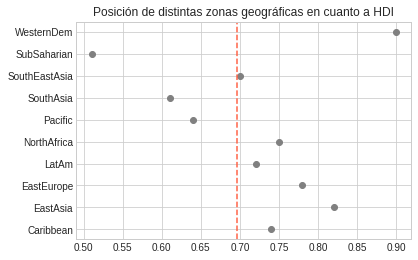

In [19]:
plt.title('Posición de distintas zonas geográficas en cuanto a HDI')
plt.plot(group_mean.values, group_mean.index, 'o', color = 'grey')
plt.axvline(hdi_group['undp_hdi'].mean(), color = 'tomato', linestyle = '--');

#### Nuestro gráfico aclara el hecho que en promedio las democracias avanzadas (Europa Occidental y Estados Unidos, Canadá y Australia) alcanza niveles de desarrollo humano sobre el .90. A diferencia, las regiones donde la vida es más precaria e inestable es el África Subsahariana y las Islas del Pacífico.

In [20]:
#guardemos la media en un objeto
hdi_mean = hdi_dropna.mean()

In [21]:
hdi_mean

0.6958010768279573

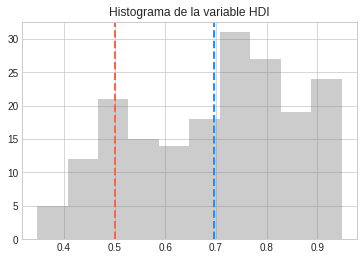

In [22]:
plt.hist(hdi_dropna, color='grey', alpha=.4)
plt.axvline(hdi_mean, color='dodgerblue', linestyle='--', lw=2)
plt.axvline(0.5, color='tomato', linestyle='--', lw=2)
plt.title('Histograma de la variable HDI');

Para clarificar aún más este punto, agreguemos la media de la variable a nuestro histograma. Para
ello utilizaremos el método axvline de matplotlib , que inserta una línea vertical.
También agregaremos una línea vertical que señale la mitad de la escala de la variable, no su
mediana. Así observaremos cuántos países alcanzan una situación deficiente.

### Cabe destacar que entre .50 y .70 encontramos a los países en vías de desarrollo.

## La distribución normal: Caracterizando nuestras variables

### ¿Y cómo comprobamos la normalidad de una variable?

### Media

### El parámetro media gobierna el punto donde se concentra la mayoría de los datos. Ésta sigue la definición de las medidas de tendencia central

### Varianza

### El parámetro varianza representa qué tan concentrados están los datos entorno a la media

In [23]:
print("La media es: ", round(hdi_dropna.mean(), 3))
print("La varianza es: ", round(np.var(hdi_dropna), 3))

La media es:  0.696
La varianza es:  0.024


### sobreponer la curva gaussiana

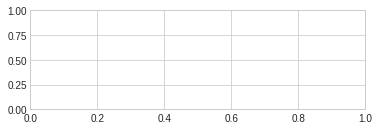

In [24]:
# Con plt.subplot vamos a dividir el espacio del en dos partes
plt.subplot(2,1,1)

/home/cristian/anaconda3/lib/python3.7/site-packages/matplotlib/axes/_axes.py:6521: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


Text(0.5, 1.0, 'Histograma del IDH')

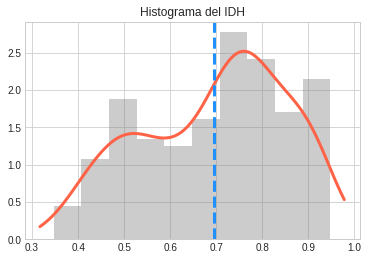

In [25]:
# Graficamos el mismo histograma, especificando Normed para que el histograma represente densidades y no frecuencias
plt.hist(hdi_dropna, color='grey', alpha=.4, normed=True)

# extraemos los límites del histograma
x_min, x_max = plt.xlim()

# utilizandos los límites del histograma para crear un array
x_axis = np.linspace(x_min, x_max, 100)
x_axis.shape

# graficamos la curva de densidad empirica (permite comparar directamente con la curva de densidad teorica)
gauss_kde = stats.gaussian_kde(hdi_dropna) # Kernel gaussiano
Z = np.reshape(gauss_kde(x_axis).T, x_axis.shape)
plt.plot(x_axis, Z, color='tomato', lw=3)

# agregamos la línea vertical para identificar la media
plt.axvline(hdi_dropna.mean(), color='dodgerblue', linestyle='--', lw=3)
plt.title("Histograma del IDH")

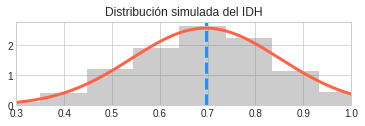

In [26]:
# El segundo gráfico
plt.subplot(2, 1, 2)

# Simulamos cómo debería comportarse un histograma normal.
plt.hist(np.random.normal(0.696, np.sqrt(0.024), 1000), color='grey', alpha=.4, normed=True)

# Fijamos los límites del eje x
plt.xlim(0.3, 1)

# Generamos una lista entre
x_axis = np.linspace(.3, 1, 1000)
plt.plot(x_axis, stats.norm.pdf(x_axis, 0.696, np.sqrt(0.024)), color='tomato', lw=3)
plt.axvline(0.696, color='dodgerblue', linestyle='--', lw=3)
plt.title("Distribución simulada del IDH")
plt.subplots_adjust(hspace=0.6)

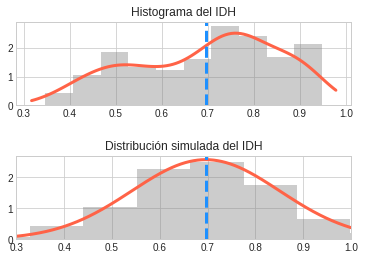

In [27]:
# Con plt.subplot vamos a dividir el espacio del en dos partes
plt.subplot(2,1,1)
# Graficamos el mismo histograma, especificando Normed para que el histograma represente densidades y no frecuencias
plt.hist(hdi_dropna, color='grey', alpha=.4, normed=True)
# extraemos los límites del histograma
x_min, x_max = plt.xlim()
# utilizandos los límites del histograma para crear un array
x_axis = np.linspace(x_min, x_max, 100)
# graficamos la curva de densidad empirica (permite comparar directamente con la curva de densidad teorica)
gauss_kde = stats.gaussian_kde(hdi_dropna) # Kernel gaussiano
Z = np.reshape(gauss_kde(x_axis).T, x_axis.shape)
plt.plot(x_axis, Z, color='tomato', lw=3)
# agregamos la línea vertical para identificar la media
plt.axvline(hdi_dropna.mean(), color='dodgerblue', linestyle='--', lw=3)
plt.title("Histograma del IDH")

# El segundo gráfico
plt.subplot(2, 1, 2)
# Simulamos cómo debería comportarse un histograma normal.
plt.hist(np.random.normal(0.696, np.sqrt(0.024), 1000), color='grey', alpha=.4, normed=True)
# Fijamos los límites del eje x
plt.xlim(0.3, 1)
# Generamos una lista entre
x_axis = np.linspace(.3, 1, 1000)
plt.plot(x_axis, stats.norm.pdf(x_axis,0.696, np.sqrt(0.024)), color='tomato', lw=3)
plt.axvline(0.696, color='dodgerblue', linestyle='--', lw=3)
plt.title("Distribución simulada del IDH")
plt.subplots_adjust(hspace=0.6)

In [28]:
#gfx.normal_distributions()

## Una variable no-normal y una posible transformación

In [29]:
# generemos la normalización del gdp mediante el logaritmo.
gdp_dropna = df['gle_cgdpc'].dropna()
log_gdp = np.log(gdp_dropna)
log_gdp

0       7.156676
1       9.049784
2       8.594556
3      10.384905
4       8.235149
5       9.413910
6       9.189455
7       9.622623
8      10.561317
9      10.567928
10      9.983778
11     10.021203
12      7.493674
13      8.772136
14     10.038410
15     10.427171
16      8.637466
17      8.299999
18      9.048721
19      9.454911
20      9.191692
21      8.802243
22      7.655892
23     10.738652
24      9.544485
25      8.654059
26      6.497634
27      9.785866
28      7.563751
29      7.885521
         ...    
162    10.344524
165     8.707673
166     8.321190
167    10.571340
168    10.828825
169     8.362740
170     8.186645
171     9.137293
172     6.943393
173     8.284519
174    10.002842
175     9.918874
176     8.841055
177     9.735111
178     9.489289
179     8.062764
180     7.202996
181     9.140639
182     9.170622
183     8.630211
184    10.457115
185     7.255803
186    10.774147
187     6.999386
188     9.457579
189     8.905271
190     9.260459
191     8.0607

In [30]:
print(round(log_gdp.mean() ,2))

8.85


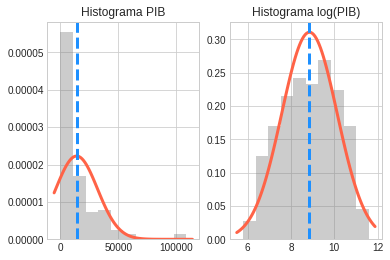

In [31]:
plt.subplot(1, 2, 1)
plt.hist(gdp_dropna, color='grey', alpha=.4, normed=True)
x_min, x_max = plt.xlim()
x_axis = np.linspace(x_min, x_max, 100)
plt.plot(x_axis, stats.norm.pdf(x_axis, gdp_dropna.mean(), gdp_dropna.std()), color='tomato', lw=3)
plt.axvline(gdp_dropna.mean(), color='dodgerblue', linestyle='--', lw=3)
plt.title("Histograma PIB")

plt.subplot(1, 2, 2)
plt.hist(log_gdp, color='grey', alpha=.4, normed=True)
x_min, x_max = plt.xlim()
x_axis = np.linspace(x_min, x_max, 100)
plt.plot(x_axis, stats.norm.pdf(x_axis, log_gdp.mean(), log_gdp.std()), color='tomato', lw=3)
plt.axvline(log_gdp.mean(), color='dodgerblue', linestyle='--', lw=3)
plt.title("Histograma log(PIB)");

<b>Hay pocos países que tienen ingresos
promedio de 100000 dolares o más que escapan de la media, mientras que hay una amplia
mayoría de observaciones con ingresos bajo la media</b>

### Esta distribución altamente sesgada donde algunos valores se escapan de forma substancial de la muestra se puede corregir mediante la distribución lognormal.

### ¿Cuál es el índice de desarrollo humano de Chile?

In [32]:
chile = df[df['cname'] == 'Chile']

In [33]:
chile.head(5)

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relsch,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust,flagnull
35,152,Chile,CHL,155.0,152.0,QoGStdCSJan18,NaN,NaN,22.0,7.0,...,2.833918,2.264085,5.997994,7.269231,6.959651,3.883884,0.14309,-0.082681,0.127703,False


In [34]:
chile['undp_hdi']

35    0.845
Name: undp_hdi, dtype: float64

In [35]:
hdi_chile = df[df['cname']=='Chile']['undp_hdi']
print('hdi Chile: %.3f' %hdi_chile)
print('hdi medio a nivel mundial: %.3f' %round(hdi_dropna.mean(),3))

hdi Chile: 0.845
hdi medio a nivel mundial: 0.696


## calcular el puntaje-z de Chile es la siguiente 

In [36]:
print('Puntaje Z para Chile: %.2f' %((hdi_chile - hdi_dropna.mean()) / np.sqrt(hdi_dropna.var())))

Puntaje Z para Chile: 0.96


<b>Con un valor final de 0.96, observamos que Chile se posiciona casi una desviación estandar
respecto al promedio mundial del índice de desarrollo humano.</b>

In [37]:
def get_zscore(col, case):
    get_point = df[df['cname']==case][col]
    preproc=df[col].dropna()
    get_mean = preproc.mean()
    get_std = np.sqrt(preproc.var())
    return (get_point - get_mean) / get_std

In [38]:
get_zscore('undp_hdi', 'Chile')

35    0.960783
Name: undp_hdi, dtype: float64

In [39]:
get_zscore('undp_hdi', 'Namibia')

118   -0.378656
Name: undp_hdi, dtype: float64

<b>La evidencia sugiere que el nivel de desarrollo humano de Namibia comparado al promedio mundial
es menor, sitúandose -.38 desviaciones estandar por debajo de la media</b>

In [40]:
get_zscore('undp_hdi', 'Uruguay')

188    0.632363
Name: undp_hdi, dtype: float64

<b>Para el caso de Uruguay, siguiendo las mediciones del IDH, observamos que se sitúa sobre la
media mundial, pero relativamente más abajo de Chile.</b>

In [41]:
get_zscore('undp_hdi', 'China')

36    0.245986
Name: undp_hdi, dtype: float64

In [42]:
# definamos la función
def point_zscore(col, case):
    get_point = df[df['cname']==case][col]
    preproc=df[col].dropna()
    get_mean = preproc.mean()
    get_std = np.sqrt(hdi_dropna.var())
    get_zscore = float((get_point - get_mean) / get_std)
    plt.axvline(get_zscore, ymin = 0, ymax = .4, color='tomato', lw=2)
    plt.annotate(case, xy=(get_zscore + .05, 0.06), color='tomato', rotation=60, ha='center', size = 12)

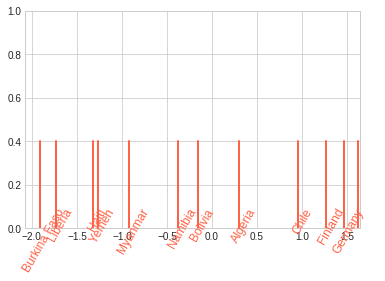

In [43]:

# Pasamos un array de casos a visualizar en un loop.
# donde para cada elemento de éste array
for i in ['Chile', 'Burkina Faso', 'Haiti', 'Myanmar', 'Germany', 
          'Norway', 'Finland', 'Yemen', 'Bolivia', 'Algeria', 'Namibia', 'Liberia']:
    # aplicaremos la función point_zscore
    point_zscore('undp_hdi', i)

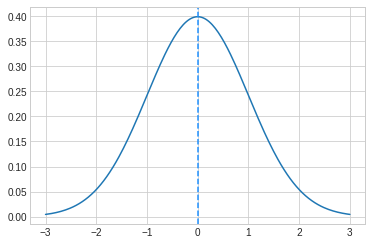

In [44]:
# generamos un array lineal
x_axis = np.linspace(-3, 3, 200)
# simulamos la función de densidad
plt.plot(x_axis, stats.norm.pdf(x_axis, 0, 1))
# marcamos la media en 0
plt.axvline(0, color='dodgerblue', linestyle='--')

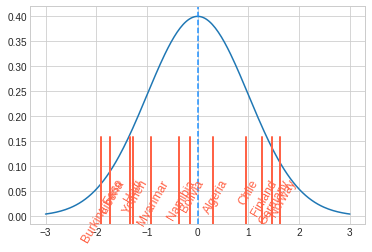

In [45]:
# generamos un array lineal
x_axis = np.linspace(-3, 3, 200)
# simulamos la función de densidad
plt.plot(x_axis, stats.norm.pdf(x_axis, 0, 1))
# marcamos la media en 0
plt.axvline(0, color='dodgerblue', linestyle='--')

# Pasamos un array de casos a visualizar en un loop.
# donde para cada elemento de éste array
for i in ['Chile', 'Burkina Faso', 'Haiti', 'Myanmar',
          'Germany', 'Norway', 'Finland', 'Yemen', 'Bolivia',
          'Algeria', 'Namibia', 'Liberia']:
    # aplicaremos la función point_zscore
    point_zscore('undp_hdi', i)

## Variables Discretas: ¿Qué pasa cuando nuestras variables miden atributos?

In [46]:
# Proporciones de cada tipo de gobierno en el dataset
df['democracies'] = np.where(df['gol_inst'] <= 2, 'Democracia', 'No Democracia')

In [47]:
df.head(5)

,ccode,cname,ccodealp,ccodecow,ccodewb,version,aid_cpnc,aid_cpsc,aid_crnc,aid_crnio,...,wvs_relsci,wvs_satfin,wvs_satlif,wvs_screl,wvs_subh,wvs_survself,wvs_tradrat,wvs_trust,flagnull,democracies
0,4,Afghanistan,AFG,700.0,4.0,QoGStdCSJan18,NaN,NaN,29.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,No Democracia
1,8,Albania,ALB,339.0,8.0,QoGStdCSJan18,NaN,NaN,26.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Democracia
2,12,Algeria,DZA,615.0,12.0,QoGStdCSJan18,NaN,NaN,21.0,6.0,...,3.681347,5.988125,6.301029,5.339371,3.805579,-0.409807,-0.498164,0.179286,False,No Democracia
3,20,Andorra,AND,232.0,20.0,QoGStdCSJan18,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,Democracia
4,24,Angola,AGO,540.0,24.0,QoGStdCSJan18,NaN,NaN,22.0,13.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,No Democracia


In [48]:
# pidamos los porcentajes de democracias
democount = df['democracies'].value_counts('%').round(2)
democount

Democracia       0.65
No Democracia    0.35
Name: democracies, dtype: float64

In [49]:
# Conteo de tipos de gobierno en el dataset
df['democracies'].value_counts()

Democracia       127
No Democracia     67
Name: democracies, dtype: int64

<b>Acorde a nuestro criterio de recodificación, 127 observaciones se clasificaron como regímenes con
tendencias democráticas y 67 como regímenes con tendencias autoritarias. El objeto democount
que creamos nos puede servir para generar un gráfico de barras</b>

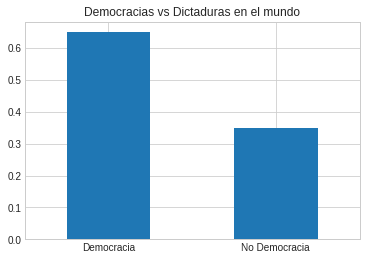

In [50]:
democount.plot(kind = 'bar')
plt.title("Democracias vs Dictaduras en el mundo")
plt.xticks(rotation = 'horizontal');

<b>Observamos que el 65.4% de las observaciones son clasificadas como democracias. Si tomamos
un país al azar de los registrados en el dataset, hay un 65% de probabilidad de que el país sea una
variante de régimen democrático.</b>

In [51]:
mu, sigma = stats.bernoulli.stats(.65)
print("La media del ensayo de Bernoulli es de: ", mu.round(2))
print("La varianza del ensayo de Bernoulli es de: ", sigma.round(2))
print("La probabilidad de ocurrencia asumiendo una desviación estandar se encuentra entre :",
round(mu - sigma, 2), round(mu + sigma, 2))

La media del ensayo de Bernoulli es de:  0.65
La varianza del ensayo de Bernoulli es de:  0.23
La probabilidad de ocurrencia asumiendo una desviación estandar se encuentra entre : 0.42 0.88


## Distribución Binomial: Analizando una serie de ensayos de Bernoulli

In [52]:
prob_dem = stats.binom(len(df), .654)
mu, sigma = prob_dem.stats()
print("Con", len(df), "países y una probabilidad de .654, esperamos que", mu, " países tengan regímenes democráticos." )

Con 194 países y una probabilidad de .654, esperamos que 126.876  países tengan regímenes democráticos.


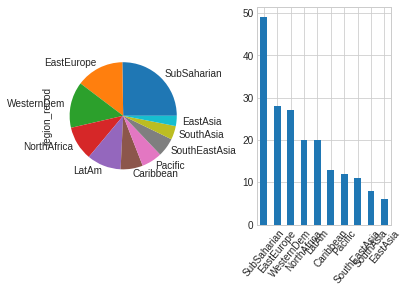

In [53]:
plt.subplot(1,2,1)
hdi_group.region_recod.value_counts().plot(kind='pie')
plt.subplot(1,2,2)
hdi_group.region_recod.value_counts().plot(kind='bar')
plt.subplots_adjust(wspace=0.5)
plt.xticks(rotation = 50);